# Question 2: 

# HeatMap of Correlations

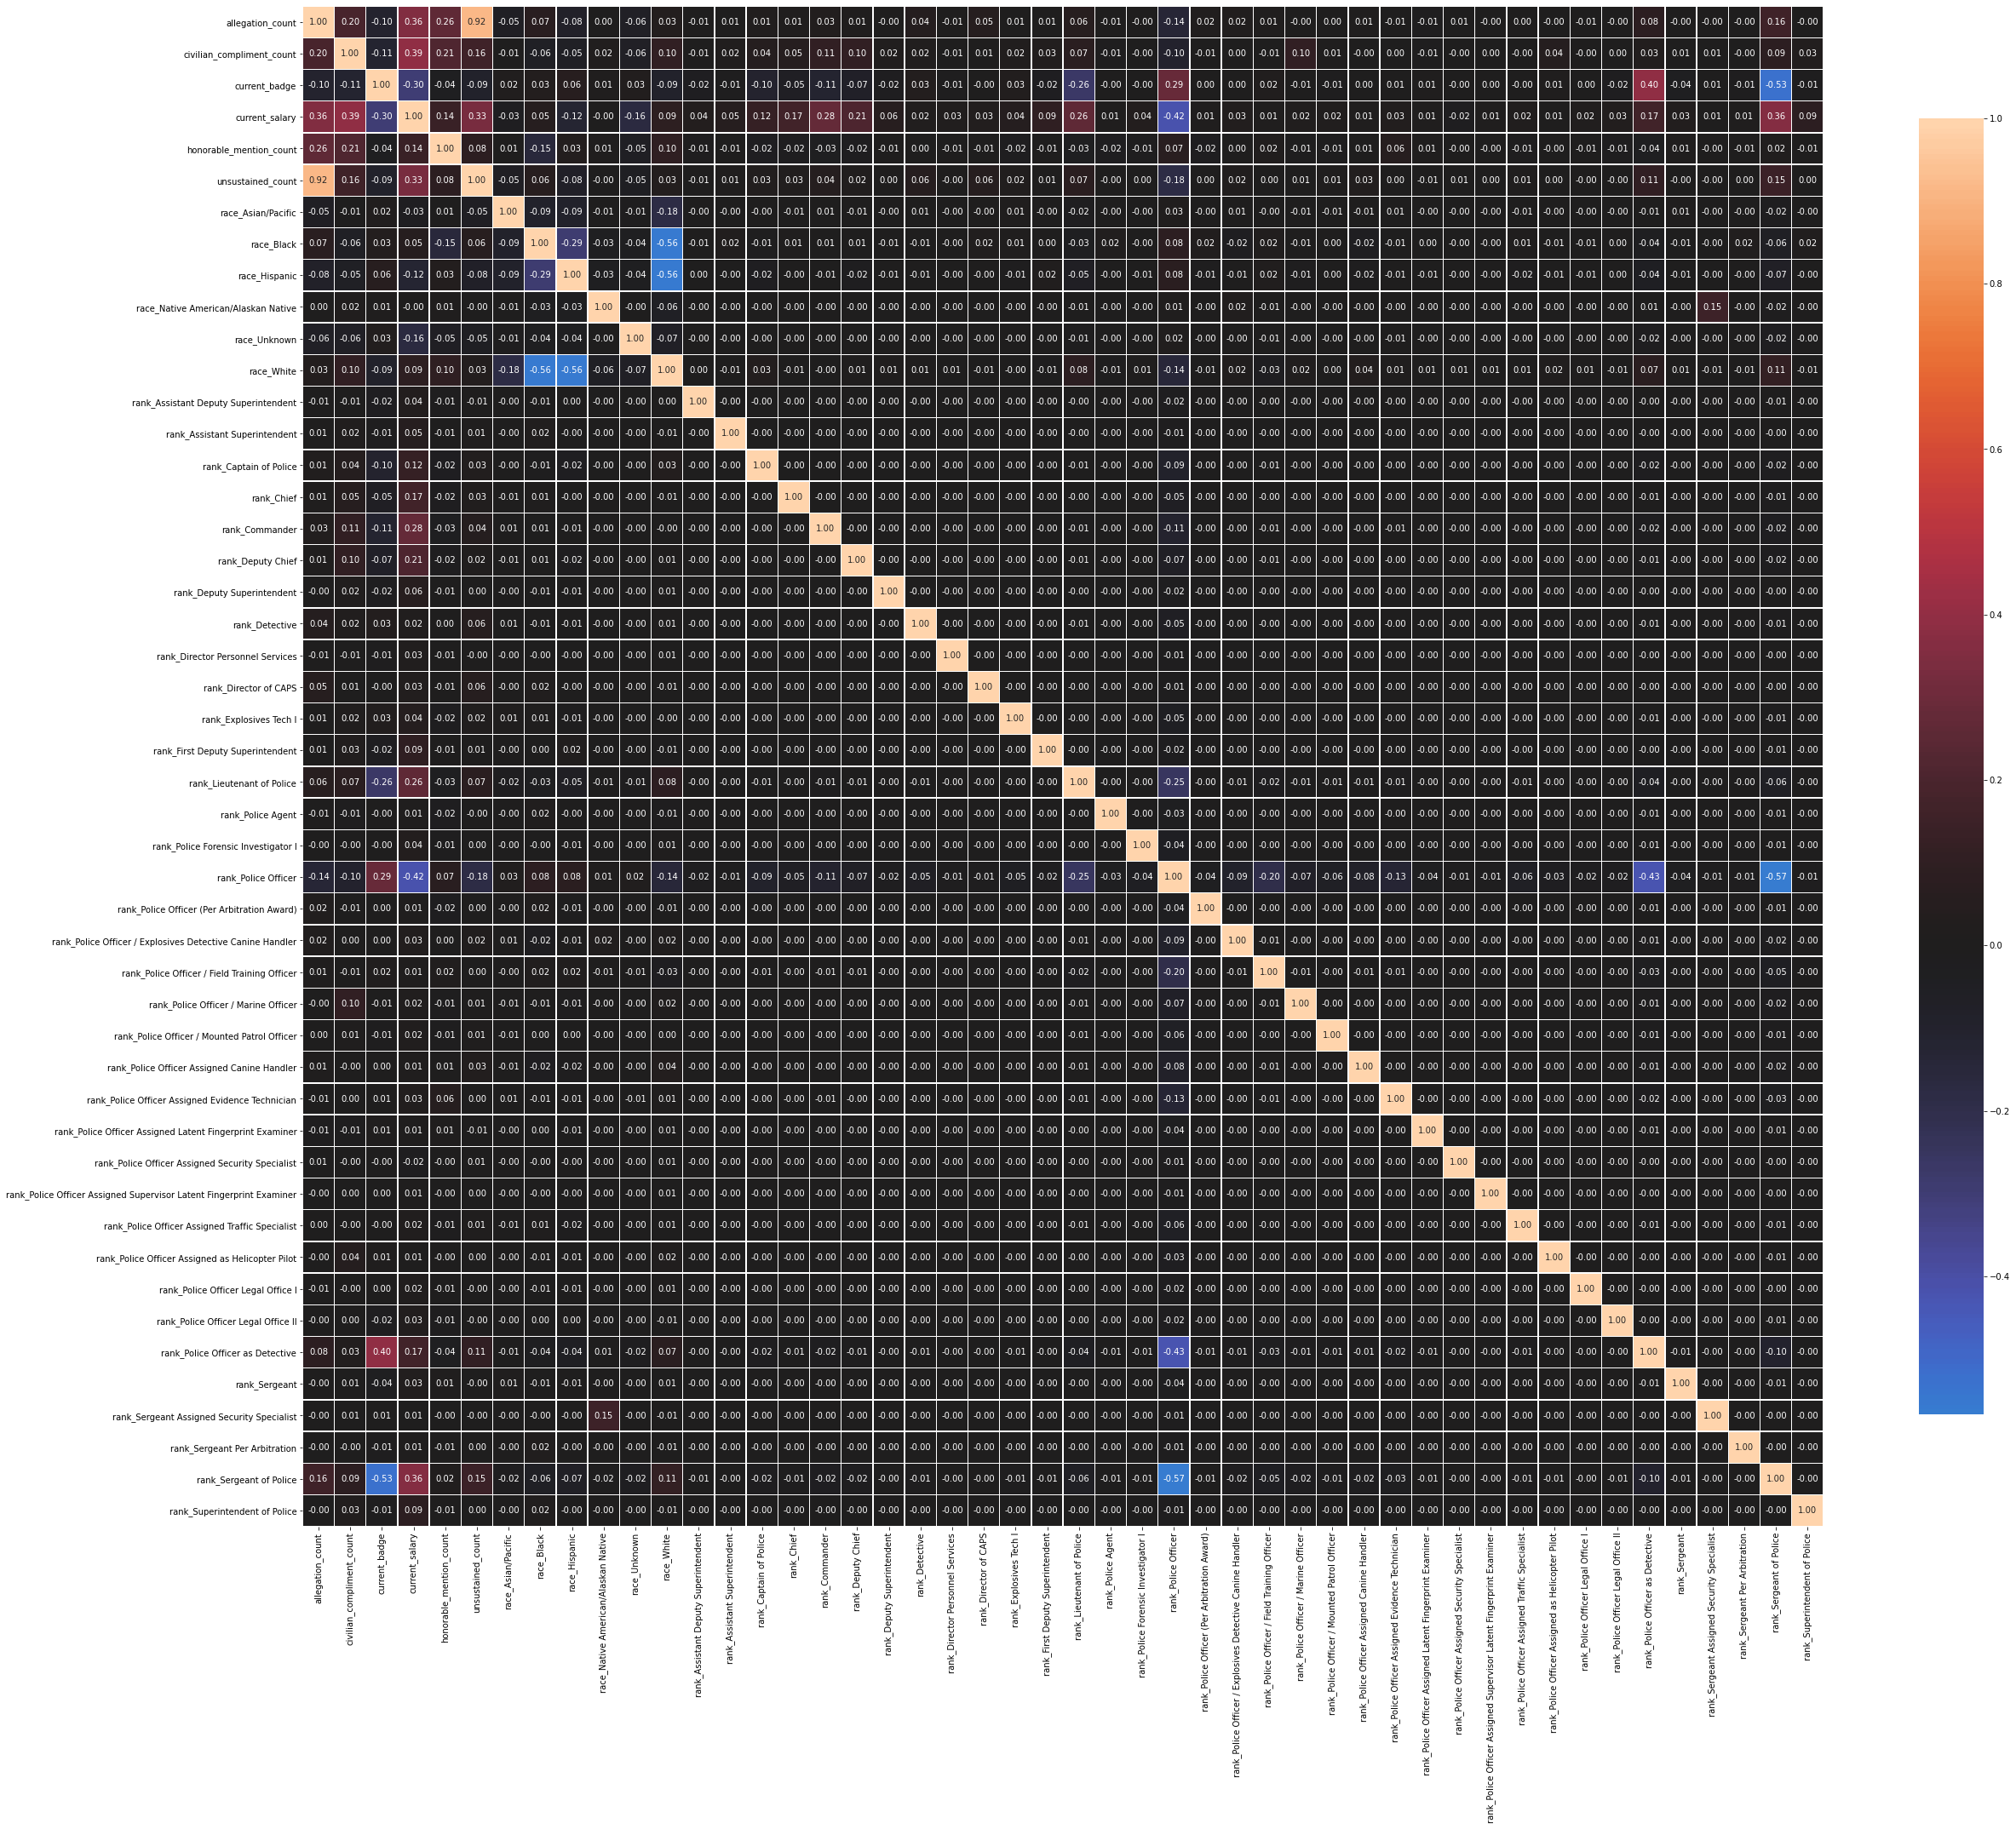

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_1 = pd.read_csv("./Data/new_q2.csv", skiprows= 0) 

def correlation_heatmap(train):
    correlations_1 = train.corr()

    fig, ax = plt.subplots(figsize=(40,40))
    sns.heatmap(correlations_1, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();

train_1 =  pd.get_dummies(train_1, columns=["race", "rank"], prefix=["race", "rank"])

correlation_heatmap(train_1)

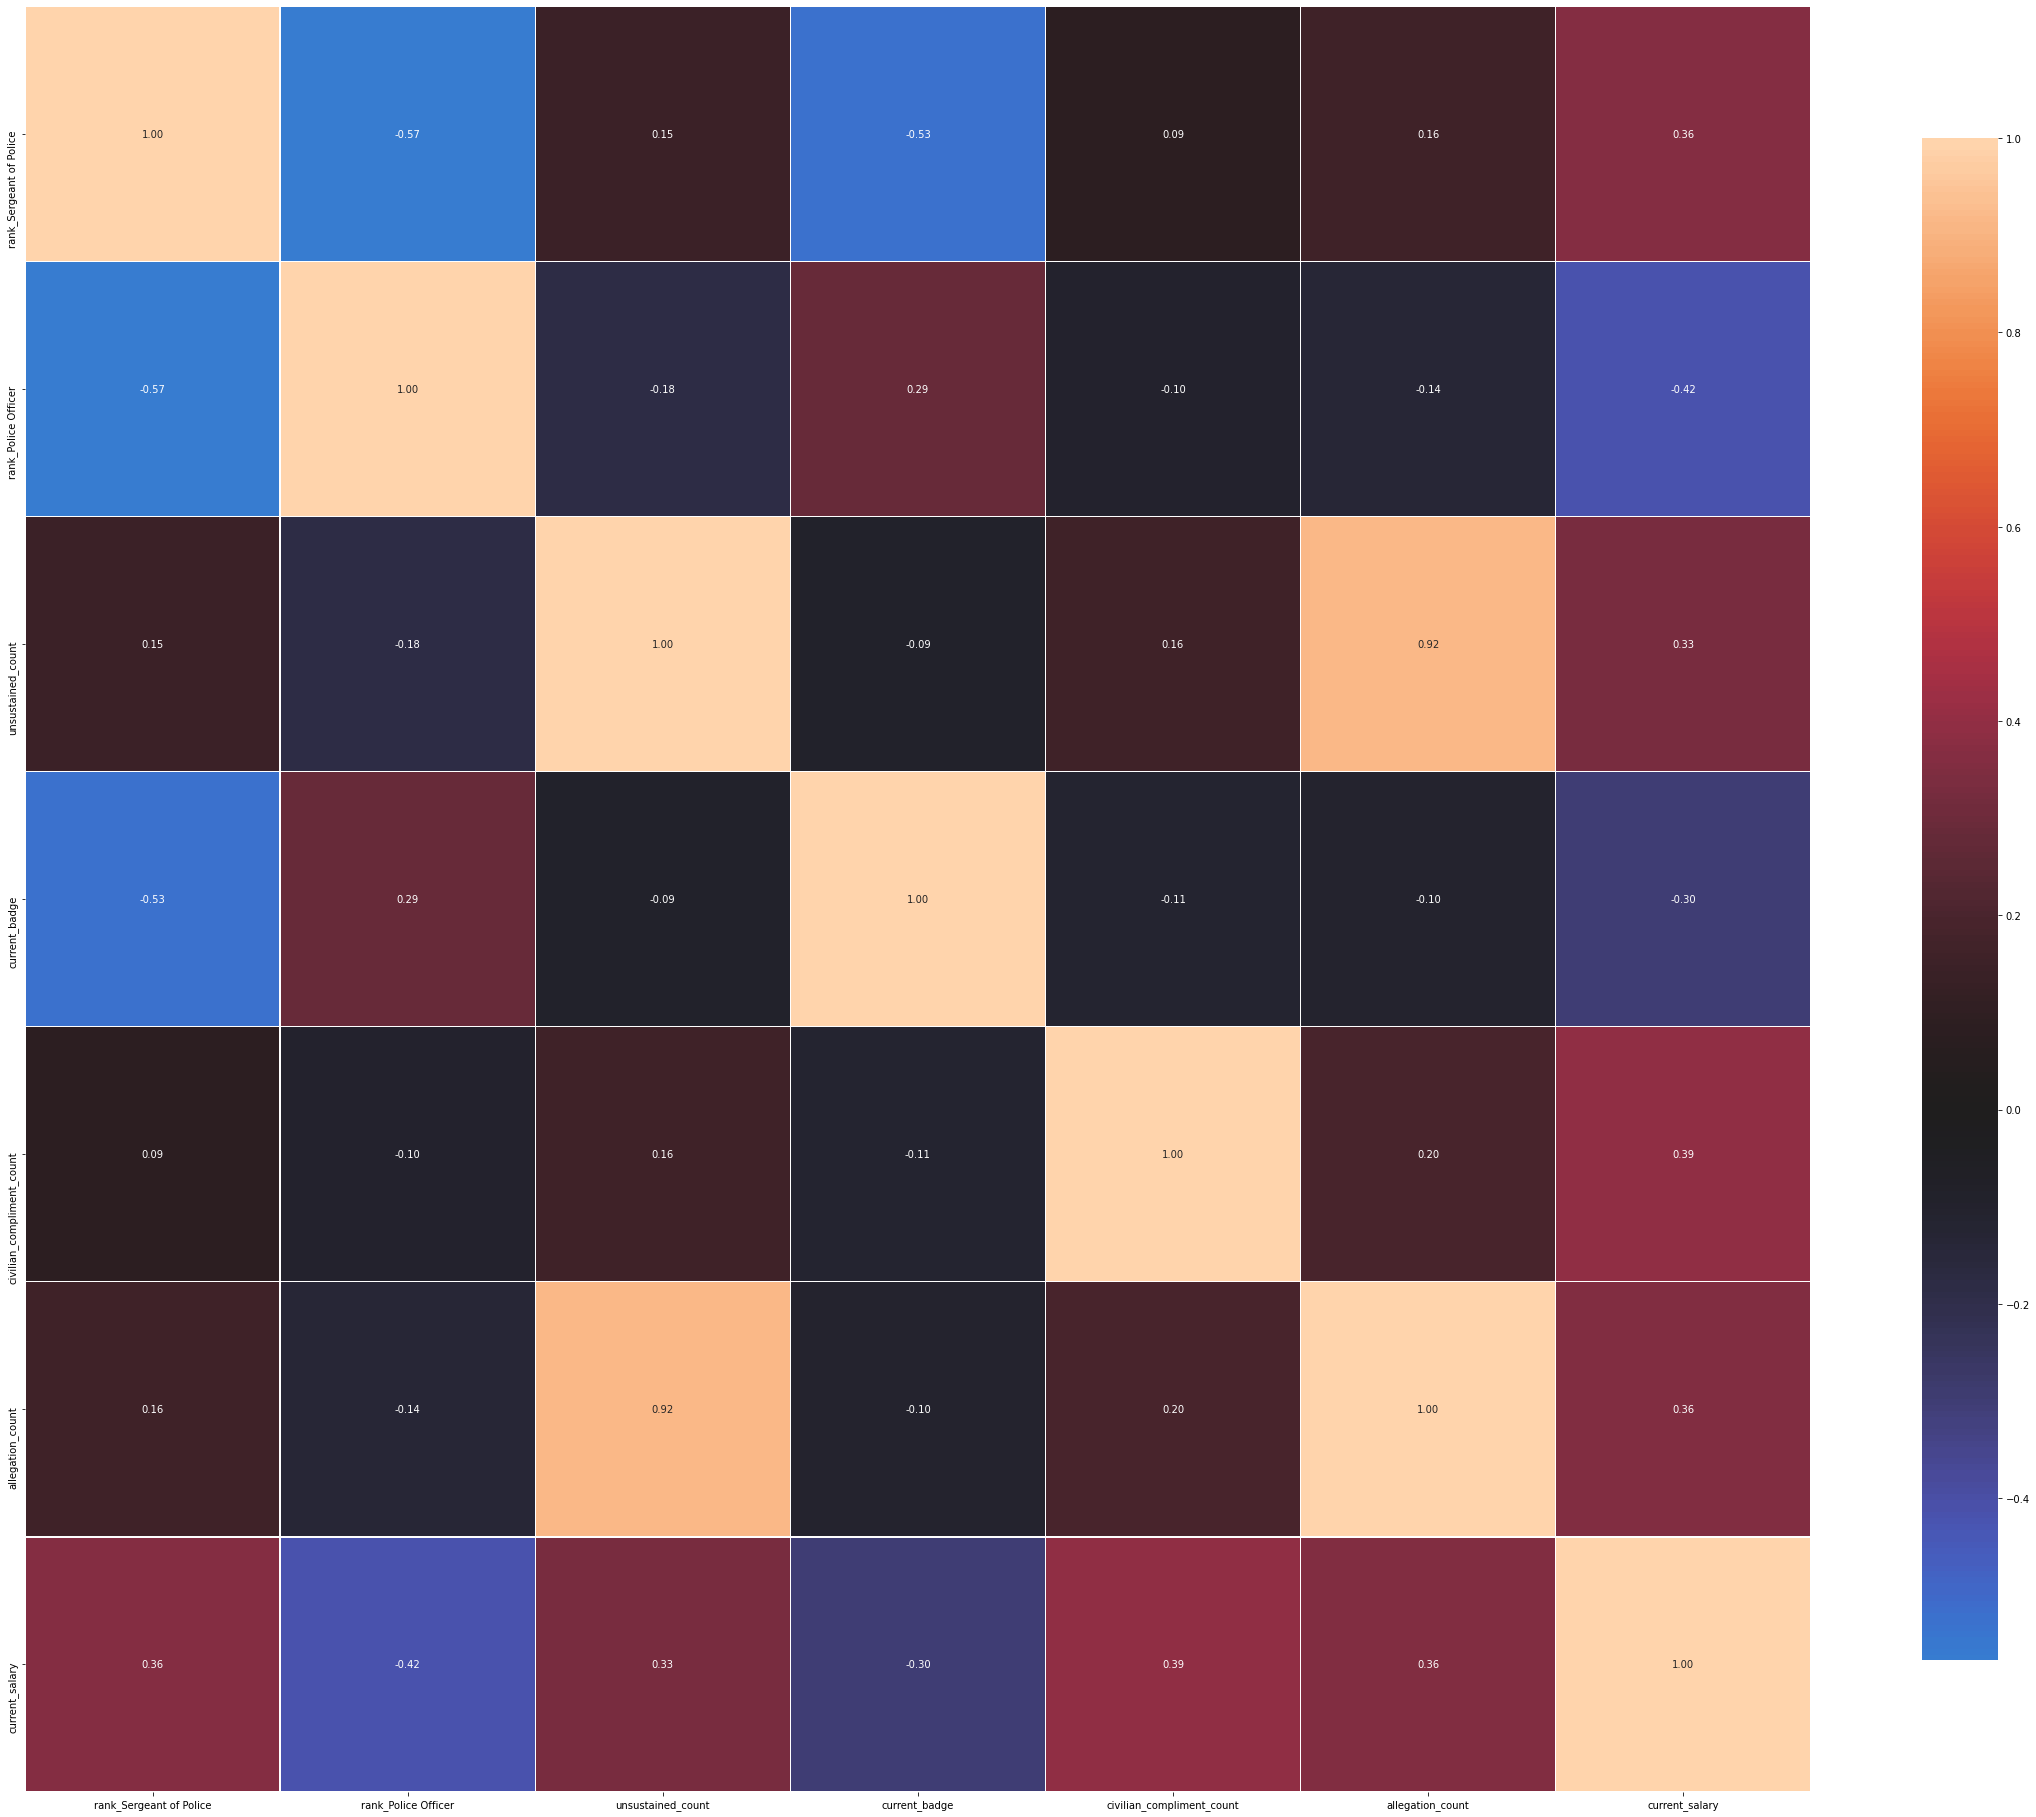

In [53]:
correalted_df = train_1[['rank_Sergeant of Police', 'rank_Police Officer', 'unsustained_count', 'current_badge',
       'civilian_compliment_count', 'allegation_count', 'current_salary']]

correlation_heatmap(correalted_df)

In [54]:
X = correalted_df[['rank_Sergeant of Police', 'rank_Police Officer', 'unsustained_count', 'current_badge',
       'civilian_compliment_count', 'allegation_count']]
y = correalted_df[['current_salary']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model: Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred1 = model1.predict(X_test)

### Accuracy Score:

In [56]:
# compute accuracy score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R^2 Score:', r2_score(y_test, y_pred1))
print('MSE:', mean_squared_error(y_test, y_pred1))

R^2 Score: 0.3664436926871294
MSE: 163211754.29945555


## Model: Polynomial Regression (degree = 2)

In [59]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_poly2_train = poly.fit_transform(X_train)
X_poly2_test = poly.fit_transform(X_test)
model2 = LinearRegression()
model2.fit(X_poly2_train, y_train)
y_pred2 = model2.predict(X_poly2_test)

### Accuracy Score:

In [39]:
print('R^2 Score:', r2_score(y_test, y_pred2))
print('MSE:', mean_squared_error(y_test, y_pred2))

R^2 Score: 0.5247935922459649
MSE: 122418908.26220942


## Model: Polynomial Regression (degree = 3)

In [58]:
poly = PolynomialFeatures(3)
X_poly3_train = poly.fit_transform(X_train)
X_poly3_test = poly.fit_transform(X_test)
model3 = LinearRegression()
model3.fit(X_poly3_train, y_train)
y_pred3 = model3.predict(X_poly3_test)

### Accuracy Score:

In [43]:
print('R^2 Score:', r2_score(y_test, y_pred3))
print('MSE:', mean_squared_error(y_test, y_pred3))

R^2 Score: 0.6348213324850279
MSE: 94074433.90571922


## Model: Polynomial Regression (degree = 4)

In [57]:
poly = PolynomialFeatures(4)
X_poly4_train = poly.fit_transform(X_train)
X_poly4_test = poly.fit_transform(X_test)
model4 = LinearRegression()
model4.fit(X_poly4_train, y_train)
y_pred4 = model4.predict(X_poly4_test)

### Accuracy Score:

In [47]:
print('R^2 Score:', r2_score(y_test, y_pred4))
print('MSE:', mean_squared_error(y_test, y_pred4))

R^2 Score: 0.45300225058951316
MSE: 140913224.67894226


## Neural Networks

In [49]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
y_pred_nn = regr.predict(X_test)
y_pred_nn  = y_pred_nn.reshape((y_pred_nn.shape[0],1))

In [52]:
print('R^2 Score:', r2_score(y_test, y_pred_nn))
print('MSE:', mean_squared_error(y_test, y_pred_nn))

R^2 Score: -1.6932584147607308
MSE: 693815885.9458642
